In [20]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import socket
import struct

# 2. Load the dataset
df = pd.read_csv('../data/creditcard.csv')

# 3. Preview the dataset
print(df.head())

print(df.info())  # Shows data types

# 4. Summary statistics for numerical features
print(df.describe())

# 5. Handling Missing Values

# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# missing values, count and percent
if not missing.empty:
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
    print(missing_df)

    # handling Missing values
 
    df.dropna(inplace=True)
    
    # Option 2 (if preferred): Impute missing values
    # df['ColumnName'].fillna(df['ColumnName'].mean(), inplace=True)

# 6. Data Cleaning

# Remove duplicates
df.drop_duplicates(inplace=True)


# Convert time column if applicable

df['Time'] = pd.to_datetime(df['Time'], unit='s')  

# Checking final data types and shape
print(df.info())
print("Final shape:", df.shape)



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class
0    283253
1       473
Name: count, dtype: int64


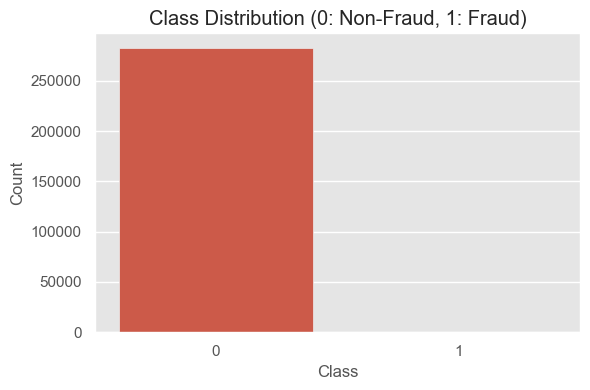

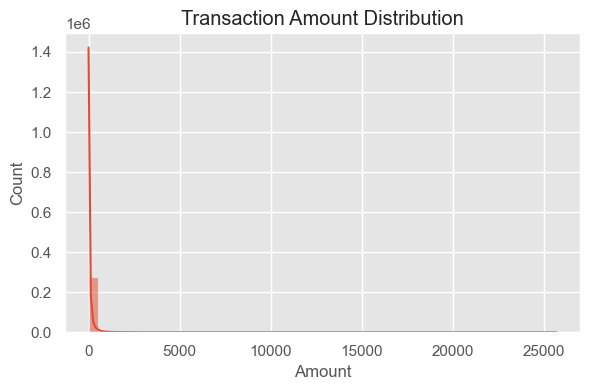

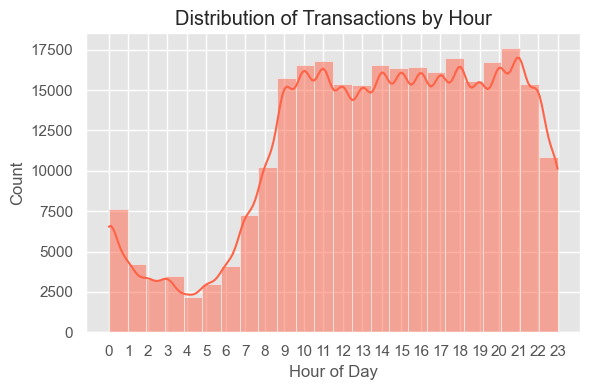

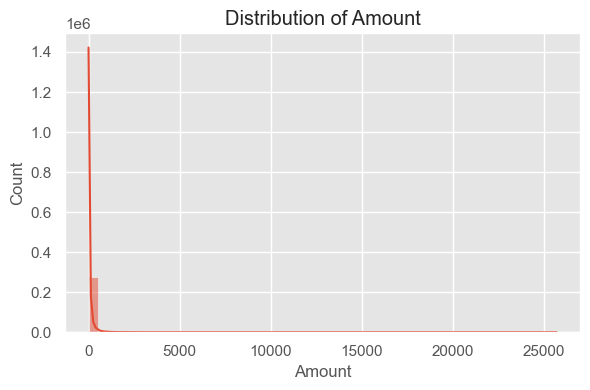

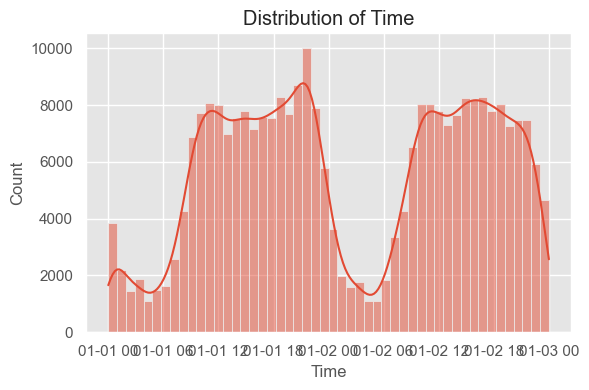

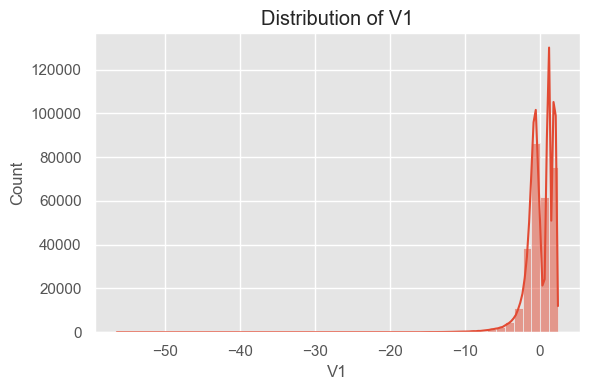

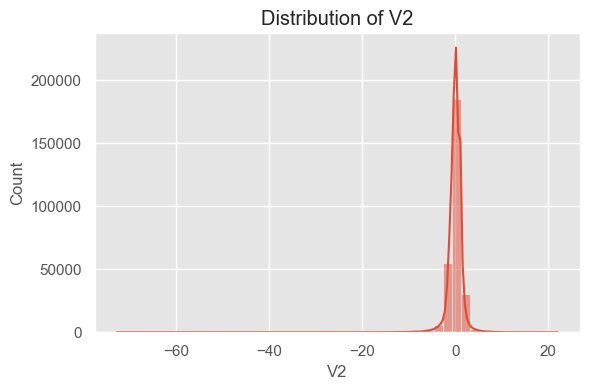

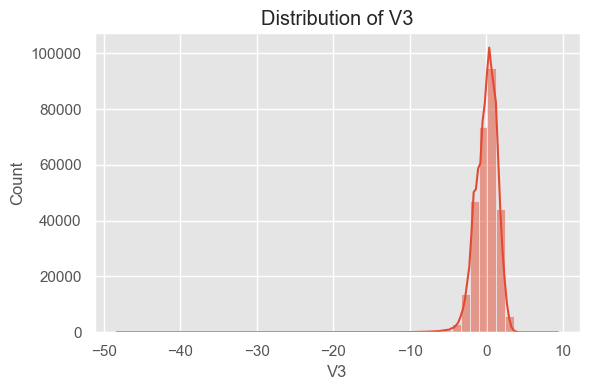

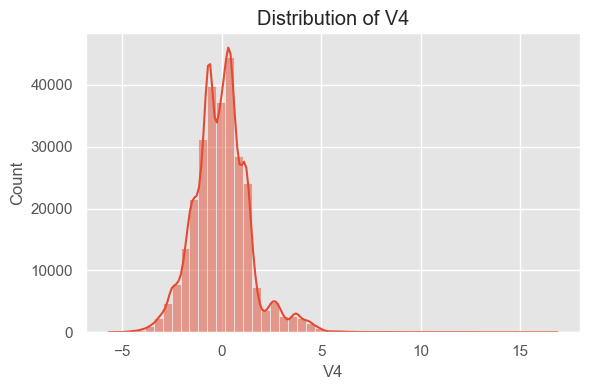

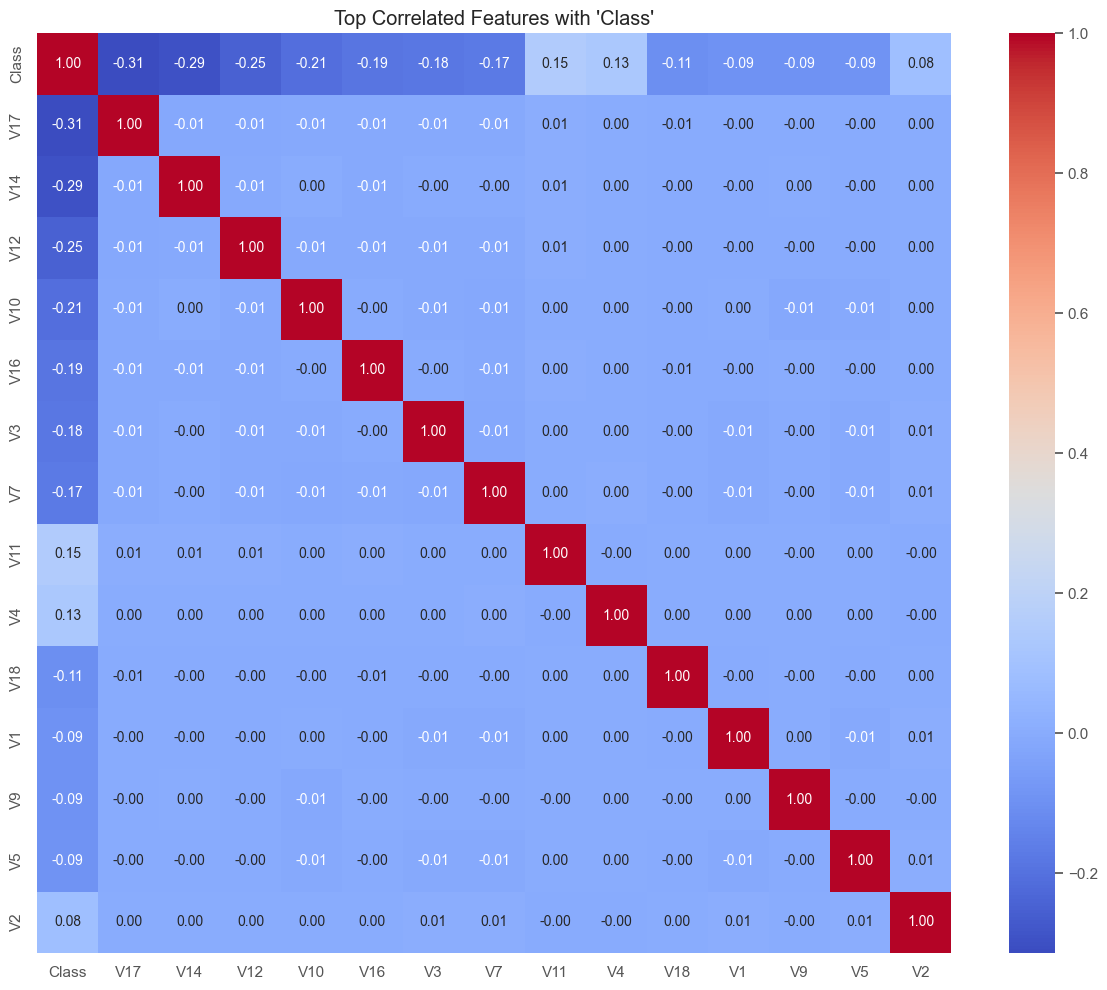

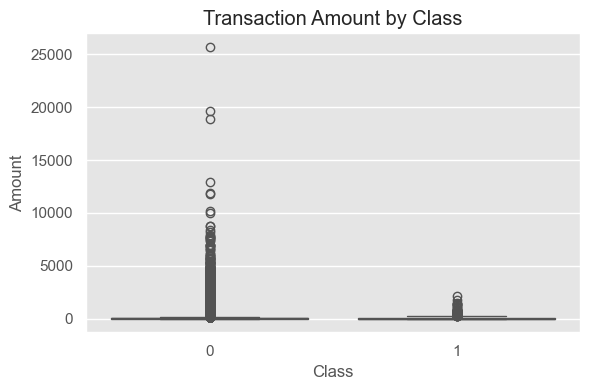

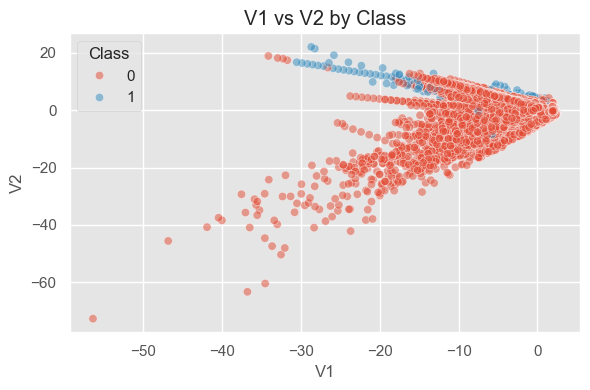

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Assuming df is already loaded with your dataset

# --- 1. Univariate Analysis ---

# Target Variable Distribution
print(df['Class'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Transaction Amount Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.tight_layout()
plt.show()

# Convert Time to Hour of Day
df['Hour'] = df['Time'].dt.hour 

plt.figure(figsize=(6, 4))
sns.histplot(df['Hour'], bins=24, kde=True, color='tomato', alpha=0.5)
plt.xticks(range(0, 24))
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution of Selected Numerical Features
numerical_cols = ['Amount', 'Time'] + [f'V{i}' for i in range(1, 5)]

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# --- 2. Bivariate Analysis ---

# Correlation Heatmap (Top 15 Features Most Correlated with 'Class')
plt.figure(figsize=(12, 10))
corr = df.corr()
top_corr_features = corr.abs().nlargest(15, 'Class')['Class'].index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with 'Class'")
plt.tight_layout()
plt.show()

# Boxplot: Amount vs Class
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class")
plt.tight_layout()
plt.show()

# Scatter Plot: V1 vs V2 colored by Class
plt.figure(figsize=(6, 4))
sns.scatterplot(x='V1', y='V2', hue='Class', data=df, alpha=0.5)
plt.title("V1 vs V2 by Class")
plt.tight_layout()
plt.show()


In [17]:
# 1. Load the datasets

# 1. Load fraud data (IP already stored as float)
fraud_df = pd.read_csv("../data/Fraud_Data.csv")

# 2. Convert IP float to integer
fraud_df['ip_int'] = fraud_df['ip_address'].astype(float).astype(int)

# 3. Load IP range dataset
ip_df = pd.read_csv("../data/IpAddress_to_Country.csv")

# 4. Convert lower and upper bounds to integer
ip_df['lower_bound_ip_int'] = ip_df['lower_bound_ip_address'].astype(float).astype(int)
ip_df['upper_bound_ip_int'] = ip_df['upper_bound_ip_address'].astype(float).astype(int)

# 5. Function to find country based on IP range
def find_country(ip_int):
    row = ip_df[(ip_df['lower_bound_ip_int'] <= ip_int) & (ip_df['upper_bound_ip_int'] >= ip_int)]
    if not row.empty:
        return row.iloc[0]['country']
    return 'Unknown'

# 6. Apply the function
fraud_df['country'] = fraud_df['ip_int'].apply(find_country)

# 7. View the results
print(fraud_df[['ip_address', 'ip_int', 'country']].head())

def int_to_ip(ip_int):
    try:
        return socket.inet_ntoa(struct.pack("!I", ip_int))
    except:
        return None

fraud_df['ip_string'] = fraud_df['ip_int'].apply(int_to_ip)
print(fraud_df[['ip_string', 'ip_int', 'country']].head())


     ip_address      ip_int        country
0  7.327584e+08   732758368          Japan
1  3.503114e+08   350311387  United States
2  2.621474e+09  2621473820  United States
3  3.840542e+09  3840542443        Unknown
4  4.155831e+08   415583117  United States
       ip_string      ip_int        country
0    43.173.1.96   732758368          Japan
1  20.225.83.219   350311387  United States
2  156.64.132.28  2621473820  United States
3  228.234.6.235  3840542443        Unknown
4  24.197.75.141   415583117  United States


In [18]:
df = pd.read_csv('../data/Fraud_Data.csv')

# Convert timestamps to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Feature 1: Hour of Day (0–23)
df['hour_of_day'] = df['purchase_time'].dt.hour

# Feature 2: Day of Week (0=Monday, 6=Sunday)
df['day_of_week'] = df['purchase_time'].dt.dayofweek

# Feature 3: Time Since Signup (in minutes)
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 60

# Sort by user and purchase time
df = df.sort_values(by=['user_id', 'purchase_time'])

# Feature 4: User Transaction Count
df['user_transaction_count'] = df.groupby('user_id').cumcount() + 1

# Feature 5: Time Since Last Transaction (in minutes)
df['time_since_last_transaction'] = df.groupby('user_id')['purchase_time'].diff().dt.total_seconds() / 60

# Feature 6: Transaction Velocity (transactions per hour)
df['transaction_velocity'] = 1 / (df['time_since_last_transaction'] / 60)

# Fill missing values (optional)
df['time_since_last_transaction'] = df['time_since_last_transaction'].fillna(np.nan)
df['transaction_velocity'] = df['transaction_velocity'].fillna(0)

# Preview result
print(df[['user_id', 'hour_of_day', 'day_of_week', 'time_since_signup',
          'user_transaction_count', 'time_since_last_transaction', 'transaction_velocity']].head())

fraud_df.to_csv("../data/processed/fraud_data_with_country.csv", index=False)



        user_id  hour_of_day  day_of_week  time_since_signup  \
116708        2           10            5       59416.400000   
15108         4           21            5      167331.316667   
46047         8           11            3      111120.016667   
67650         9           23            2        6188.166667   
109067       12           20            2       77191.416667   

        user_transaction_count  time_since_last_transaction  \
116708                       1                          NaN   
15108                        1                          NaN   
46047                        1                          NaN   
67650                        1                          NaN   
109067                       1                          NaN   

        transaction_velocity  
116708                   0.0  
15108                    0.0  
46047                    0.0  
67650                    0.0  
109067                   0.0  
